## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [56]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [57]:
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [58]:
print('The number of row is', df.shape[0])

The number of row is 294478


c. The number of unique users in the dataset.

In [59]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [60]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [61]:
# if new_page and treatment page does not match, then control and new_page or treatment and old_page must match
df_match = df.query('(group == "control" and landing_page == "new_page") or (group == "treatment" and landing_page == "old_page")').shape[0]
print('The number of time the new_page and treatment is', df_match)

The number of time the new_page and treatment is 3893


f. Do any of the rows have missing values?

In [62]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [63]:
df2 = df.query('(group == "control" and landing_page == "old_page") or (group == "treatment" and landing_page == "new_page")')

In [64]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [65]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [66]:
df2[df2.user_id.duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [67]:
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [68]:
df2 = df2.drop_duplicates(['user_id'])

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [70]:
all_group_prob = df2.converted.mean()
all_group_prob

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [71]:
control_group_prob = df2[df2['group'] == 'control'].converted.mean()
control_group_prob

0.1203863045004612

In [72]:
df2.query('group == "control" and converted == 1').shape[0]/df2.query('group == "control"').shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [73]:
treatment_group_prob = df2[df2['group'] == 'treatment'].converted.mean()
treatment_group_prob

0.11880806551510564

In [74]:
df2.query('group == "treatment" and converted == 1').shape[0]/df2.query('group == "treatment"').shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [75]:
new_page_prob = len(df2[df2['landing_page'] == "new_page"])/len(df2['landing_page'])
new_page_prob

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [76]:
# Computing the test duration
import datetime as dt
df2['timestamp']= pd.to_datetime(df2['timestamp']) 
df2['timestamp'] = df2['timestamp'].dt.date
test_duration = df2.timestamp.max() - df2.timestamp.min()
test_duration

datetime.timedelta(22)

In [77]:
# an increase in probability  
control_group_prob - all_group_prob

0.00078921725546492183

In [78]:
# a decrease in probability  
treatment_group_prob - all_group_prob

-0.0007890217298906349

### a. the probability of an individual converting regardless of the page they receive is 0.11959708724499628 which is about 12.0%

### b. Given that an individual was in the control group,the probability they converted is 0.1203863045004612

### c.  Given that an individual was in the treatment group, the probability they converted is 0.11880806551510564

### d. The probability that an individual received the new page is 0.5000619442226688

### Although there are 22 days test duration which may be sufficient for the test. However, from the results listed above, there is no sufficient evidence to conlude that the new treatment page leads to more conversion because only 50% of indivuals that received the new page. Besides, there is just a little difference  between the overall percentage of  individual converting and the control group and this cannot make us to conclude that a treatment page leads to more conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothesis: the new page is worse or good as the page:**
**new_page <= old_page**
**Alternative: The new page is better than the old page: new_page > oldpage**


**The small values that is, large negative values of this statistic will favor the alternative hypothesis. Let's calculate the observed value of test statistic: new_page - old_page,**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [79]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [80]:
#p_new equal p_old
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [81]:
n_new = df2[df2['group'] == 'treatment']['user_id'].count()
n_new


145310

d. What is $n_{old}$, the number of individuals in the control group?

In [82]:
o_new = df2[df2['group'] == 'control']['user_id'].count()
o_new

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [83]:
new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [84]:
old_page_converted = np.random.binomial(1, p_old, o_new)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [85]:
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
p_new - p_old

0.00029403387567990269

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [86]:
p_diffs = []
for _ in range (10000):
    old_page_converted = np.random.binomial(1, p_old, o_new)
    new_page_converted = np.random.binomial(1, p_new, n_new)
    p_diff = (np.mean(new_page_converted))- (np.mean(old_page_converted))
    p_diffs.append(p_diff)   

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

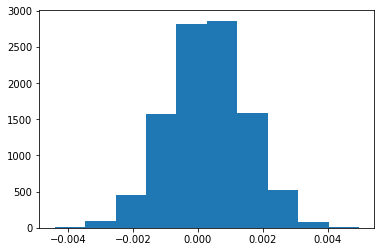

In [87]:
plt.hist(p_diffs);

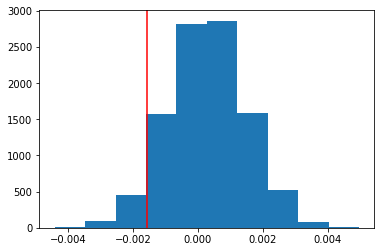

In [88]:
plt.hist(p_diffs)
actual_diff = (df2[df2['group'] == 'treatment'].converted.mean()) - (df2[df2['group'] == 'control'].converted.mean())
plt.axvline(x = actual_diff, color='red');
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [89]:
p_value = (np.array(p_diffs) > actual_diff).mean()
p_value

0.94140000000000001

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The p_value was computed in j. The P Value is the probability of seeing the effect when the null hypothesis is true. Since the p_value is greater than 0.05 (type I error rate or alpha value or significant level), there is no statistical difference betwen the conversion rate of treatment page and the control page. That means, the results obtained are not statistically significant.Therefore, the null hypothesis is not rejected.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [90]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]
n_old = df2[df2['group'] == 'control']['user_id'].count()
n_new = df2[df2['group'] == 'treatment']['user_id'].count()


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [91]:
z_score, p_val = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')

print((z_score, p_val))

(-1.3109241984234394, 0.90505831275902449)


In [92]:
stat, p_val = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],  alternative = 'larger')
('{0:0.3f}'.format(p_val))

'0.905'

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score and p_value computed from the in the previoues question mean that the conversion rates of the old and new pages are not statistically different- p_value greater than the significant level and the z-score closer to the null mean. Using z-table to convert the z-score to probability, I got 0.9041- taking absolute value of -1.311. So, the null hypothesis cannot be rejected as confirmed by the findings in parts j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since each row is either a conversion or no conversion (1 or 0), I should be performing Logistic regression in this case because logistic regression is used to predict the probability of a categorical dependent variable especially for binary response data in Data Modeling.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [93]:
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21,control,old_page,0,0
1,804228,2017-01-12,control,old_page,0,0
2,661590,2017-01-11,treatment,new_page,0,1
3,853541,2017-01-08,treatment,new_page,0,1
4,864975,2017-01-21,control,old_page,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [94]:
df2['intercept'] = 1
logit_mod = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [95]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-19 01:03 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [96]:
#Looking at the confidence interval to determine how robust coeficients are.
results.conf_int()

,0,1
intercept,-2.004579,-1.972975
ab_page,-0.037399,0.007421


In [ ]:
# better interpretation, let's fine the odd ratio OR
print(np.exp(result2.params))

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.190. This p_value is different from the p_value in part II because this test is associated with null hypothese that states that the old page has the same conversion rate as the new page, and the alternative hypothesis is that the individual pages have different conversion rates. The p_value 0.189 or 18.9% is more than the confidence level.The null and alternative hypotheses associated with model in part II are: the old page is better than or equal to the new and the new page is better than the old page respectively.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding relevant variables can prevent bias in the estimate of regression coefficient and also can increase the R-square. Using one factor, ab_page (type of page) in this model does not indicate any correlation to other factors in the dataset.The disadvantage could be overfitting your model to the training data.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [10]:
# to join using the key columns: 'user_id' (df.set_index('key').join(other.set_index('key'))
country_df = pd.read_csv('countries.csv')
df3 = country_df.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
df3.head(3)

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1


In [11]:
#creating three dummies variables 
df3[['US', 'UK', 'CA']] = pd.get_dummies(df3.country)
df3.head(2)

,country,timestamp,group,landing_page,converted,ab_page,intercept,US,UK,CA
user_id,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1


In [12]:
df_list = [ df3[['US', 'UK', 'CA']]]
for countries in df_list:
           converted_list = (countries).mean()
           print(converted_list)

US    0.049896
UK    0.249380
CA    0.700724
dtype: float64


In [14]:
import statsmodels.api as sm
# Dropping CANADA as baseline
df3['intercept'] = 1
logit_mod2= sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'CA', 'UK']]) 
result2 = logit_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [15]:
result2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-19 00:41 AIC:              212781.3782
No. Observations:   290585           BIC:              212823.6968
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2486  0.0000  -2.0822  -1.9778
ab_page       -0.0150    0.0114   -1.3076  0.1910  -0.0374   0.0075
CA             0.0408    0.0269    1.5159  0.1296  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

In [16]:
# better interpretation, let's fine the odd ratio OR
print(np.exp(result2.params))

intercept    0.131332
ab_page      0.985160
CA           1.041593
UK           1.051944
dtype: float64


$Conclusion:$
**Since the p_values for CA and the UK are greater than the signicance level, we can conclude that the interaction between the page and the user's country has no signocant effect on conversion. 
The odds of being converted increases by a factor of 1.041593 for every unit increase for user living in the Canada. 
Likewise, the odds of being converted increases by a factor of 1.051944 for every unit increase for user living in the UK.**

**References:**

1. pandas.DataFrame (n.d). retrieved from joinhttps://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

2. Yhat (2013). Logistic Regression in Python. Retrieved from http://blog.yhat.com/posts/logistic-regression-and-python.html

3. https://www.analyticsvidhya.com/blog/2019/09/everything-know-about-p-value-from-scratch-data-science/
4. https://www.pythonfordatascience.org/logistic-regression-python/

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0